In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import utils
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [4]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [5]:
from SAE_model import SAE3
from keras import optimizers
from keras import losses
from keras import metrics

In [6]:
SAE3_model = SAE3(input_dim=784, latent_dim=[150, 50, 65])
SAE3_model.compile(optimizer=optimizers.Adam(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

d:\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
history = SAE3_model.fit(train_images, train_images,
    epochs=150,
    batch_size=128,
    validation_data=(test_images, test_images))

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.8005 - loss: 0.4755 - val_binary_accuracy: 0.8031 - val_loss: 0.3332
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.8041 - loss: 0.3116 - val_binary_accuracy: 0.8035 - val_loss: 0.3086
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8022 - loss: 0.2944 - val_binary_accuracy: 0.8001 - val_loss: 0.2711
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.8022 - loss: 0.2723 - val_binary_accuracy: 0.7998 - val_loss: 0.2705
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.8033 - loss: 0.2638 - val_binary_accuracy: 0.8013 - val_loss: 0.2587
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.8025 - loss: 0.2658 - val_binary_accuracy: 0.7998 - val_loss: 0.3064
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8012 - loss: 0.2751 - val_binary_accuracy: 0.8030 - val_loss: 0.2607

In [8]:
SAE3_model.save('models/SAE3.h5')

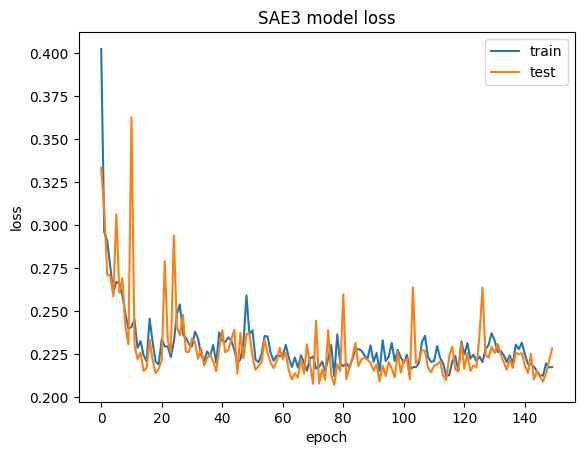

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SAE3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()